In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn import svm
%matplotlib inline


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
labeled_images = pd.read_csv('./train.csv')

In [3]:
labeled_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [4]:
images = labeled_images.iloc[0:5000, 1:]
labels = labeled_images.iloc[0:5000, :1]
train_images, test_images, train_labels, test_labels = train_test_split(
images, labels, train_size=0.8, random_state=0) 


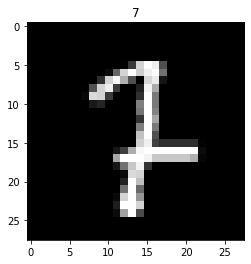

In [5]:
def show_images(i):
    img=train_images.iloc[i].values
    img=img.reshape((28,28))
    plt.imshow(img, cmap='gray')
    plt.title(train_labels.iloc[i,0])

show_images(0)

In [8]:
train_images.iloc[0].unique()

array([  0,   2,  57, 212, 255, 238,  79,  12, 102, 211, 252, 204, 239,
       254, 114,  47, 248, 175,  80, 213, 235,  21,   1,  83,  59,  31,
       242, 170,   8, 218,  49, 121,  25,  37, 126, 116, 130,  53, 165,
       194, 209,  65,  46,   3,  23,  62, 173, 247, 167, 244, 199, 176,
         6, 113,  51,   9, 217,  34, 190, 112, 106, 149,  30,  11, 163,
        75], dtype=int64)

In [9]:
clf = svm.SVC(gamma='scale')
clf.fit(train_images, train_labels.values.ravel())
clf.score(test_images, test_labels)

0.942

In [10]:
imagest = labeled_images.iloc[5001:, 1:]
labelst = labeled_images.iloc[5001:, :1]

In [11]:
clf.score(imagest, labelst)


0.9475661504364983

In [12]:
final_images = labeled_images.iloc[:, 1:]
final_labels = labeled_images.iloc[:, :1]
clff = svm.SVC(gamma='scale')
clff.fit(final_images, final_labels.values.ravel())

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [16]:
test = pd.read_csv('.//test.csv')

In [17]:
predict = clff.predict(test)

In [18]:
df = pd.DataFrame(predict)
df.index.name='ImageId'
df.index+=1
df.columns=['Label']
df.to_csv('results.csv', header=True)